# Thanki Disha Bhagvanjibhai [216270307024]

# Practical 14

# MINI PROJECT : DIABETES PREDICTION 

# -> DATA PREPROCESSING PART 

In [1]:
# importing diffrent files 

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Loading Dataset

# loading dataset
data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# finding Number of Columns present in Dataset

print(" SHAPE OF DATA : ",data.shape)

# getting the statistical measures of the dataset

data.describe().T

 SHAPE OF DATA :  (768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
# deciding feature and target variable for model

features = data.drop(columns = 'Outcome', axis = 1)
target = data['Outcome']

In [5]:
features,target

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [6]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
# Unit variance means dividing all the values by the standard deviation.

# creating object for standardscalar 

scaler = StandardScaler()

scaler.fit(features)

# This method calculates the mean and the standard deviation to use later for scaling the data.

StandardScaler()

In [7]:
# This method fits the parameters of the data and then transforms it.

standardized_data = scaler.transform(features)

# assigning this standardized_data to features 
features = standardized_data
target = data['Outcome']

features, target

(array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
         -0.47378505, -0.87137393]]),
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64)

In [8]:
# splitting data into traindata and testdata 

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)

print(" features shape : ",features.shape)
print(" X_train shape : ",X_train.shape)
print(" X_test shape : ",X_test.shape)

 features shape :  (768, 8)
 X_train shape :  (614, 8)
 X_test shape :  (154, 8)


# -> TRAINING MODEL USING LOGISTIC REGRESSION 

In [9]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

# creating object for it.
classifier =  LogisticRegression()

# training data using fit function
classifier.fit(X_train, Y_train)

# testing data using predict function
X_test_prediction = classifier.predict(X_test)

# checking accuracy for model 
logistic_acc = accuracy_score(Y_test, X_test_prediction)

# Display accuracy for Logistic regression
print()
print('Accuracy score of logistic regression = ', logistic_acc)


Accuracy score of logistic regression =  0.7662337662337663


# -> TRAINING MODEL USING SUPPORT VECTOR MACHINE 

In [10]:
# importing svm 
from sklearn import svm

# creating object of svm 
model = svm.SVC()

# training data using fit function
model.fit(X_train, Y_train)

# testing data using predict function
predicted_Y = model.predict(X_test)

# checking accuracy for model 
svm_acc = accuracy_score(Y_test, predicted_Y)


# Display accuracy for the support vector machine
print()
print(" Accuracy score of support vector machine :  ",svm_acc)


 Accuracy score of support vector machine :   0.7402597402597403


# -> TRAINING MODEL USING DECISION TREEE CLASSIFIER 

In [11]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree classifier
decision = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
decision.fit(X_train, Y_train)
             
# Evaluate the Decision Tree classifier on the test data
decision_prediction = decision.predict(X_test)

# Calculate accuracy for the Decision Tree classifier
decision_tree_acc = accuracy_score(Y_test, decision_prediction)

# Display accuracy for the Decision Tree classifier
print()
print(" Accuracy score of Decision Tree classifier : ", decision_tree_acc)


 Accuracy score of Decision Tree classifier :  0.7142857142857143


# -> TRAINING MODEL USING K-NEAREST NEIGHBOR CLASSIFIER

In [12]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier with a specific number of neighbors (e.g., 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Evaluate the KNN classifier on the test data
knn_test_data_prediction = knn_classifier.predict(X_test)

# Calculate accuracy for the KNN classifier
knn_acc = accuracy_score(Y_test, knn_test_data_prediction)

# Display accuracy for the KNN classifier
print()
print(" Accuracy score of k nearest neighbor classifier : ", knn_acc)


 Accuracy score of k nearest neighbor classifier :  0.7597402597402597


# -> TRAINING MODEL USING NAIVE BAYES CLASSIFIER 

In [13]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the Naive Bayes classifier on the training data
naive_bayes_classifier.fit(X_train, Y_train)

# Evaluate the Naive Bayes classifier on the test data
naive_bayes_test_data_prediction = naive_bayes_classifier.predict(X_test)

# Calculate accuracy for the Naive Bayes classifier
naive_bayes_acc = accuracy_score(Y_test, naive_bayes_test_data_prediction)

# Display accuracy for the Naive Bayes classifier
print()
print(" Accuracy score of Naive Bayes classifier : ", naive_bayes_acc)


 Accuracy score of Naive Bayes classifier :  0.7597402597402597


# -> TRAINING MODEL USING RANDOM FOREST CLASSIFIER 

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Train the Random Forest classifier on the training data
random_forest_classifier.fit(X_train, Y_train)

# Evaluate the Random Forest classifier on the test data
random_forest_test_data_prediction = random_forest_classifier.predict(X_test)

# Calculate accuracy for the Random Forest classifier
random_forest_acc = accuracy_score(Y_test, random_forest_test_data_prediction)

# Display accuracy for the Random Forest classifier
print()
print(" Accuracy score of Random Forest classifier :", random_forest_acc)


 Accuracy score of Random Forest classifier : 0.7532467532467533


# -> COMPARING ACCURACY OF DIFFRENT MODELS 

<Axes: >

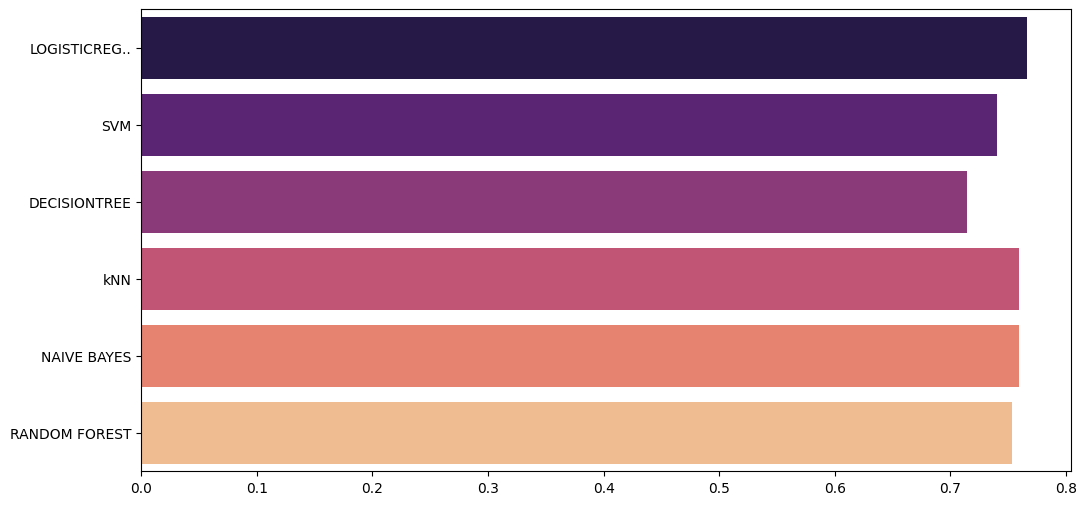

In [15]:
# ploting graph to compare accuracy of diffrent models 
plt.figure(figsize=(12,6))

model_acc = [logistic_acc,svm_acc,decision_tree_acc,knn_acc,naive_bayes_acc,random_forest_acc]
model_name = ['LOGISTICREG..','SVM','DECISIONTREE','kNN','NAIVE BAYES','RANDOM FOREST']

sns.barplot(x=model_acc, y=model_name,palette='magma')